In [74]:
import pandas as pd
import numpy as np

df = pd.read_csv('hrdcrolling/preprocessing/final.csv', index_col = 0)
# df.drop('Unnamed: 0', axis=1, inplace=True)
display(df)

from matplotlib import font_manager, rc
font_path = "../data/THEdog.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

,과정명,학원명,기간,훈련비,정원,취업률,연령대,지역1,지역2,NCS,과정
0,보험사무원(GA총무)양성과정,인컴트랜드평생교육원,42,1161380,20,93.8,36.0,인천,부평구,03_금융보험,보험사무원
1,보험총무사무원,부천여성인력개발센터,40,1106080,20,64.3,34.0,경기,부천시,03_금융보험,보험사무원
2,보험사무원(GA총무)양성과정,인컴트랜드평생교육원,28,1161380,20,93.8,31.0,인천,부평구,03_금융보험,보험사무원
3,보험총무사무원양성,은평여성인력개발센터,40,1106080,18,54.3,36.0,서울,은평구,03_금융보험,보험사무원
4,보험사무원(GA총무)양성과정,인컴트랜드평생교육원,28,1161380,20,93.8,35.0,인천,부평구,03_금융보험,보험사무원
...,...,...,...,...,...,...,...,...,...,...,...
15985,애견미용사심화과정,동물농장애견미용학원,20,802440,12,50.0,NaN,부산,동래구,24_농림어업,애견미용사
15986,[탑강] 유기농업기능사 필기,한국이러닝협회,28,152770,500,20.0,NaN,서울,구로구,24_농림어업,유기농업기능사
15987,[탑강] 유기농업산업기사 필기,한국이러닝협회,49,186500,500,20.0,NaN,서울,구로구,24_농림어업,유기농업산업기사
15988,애견미용사 취업과정,프로펫애완동물관리학원,113,2697530,15,46.9,NaN,강원,원주시,24_농림어업,애견미용사


## 연령대별 취업률 높은 과정

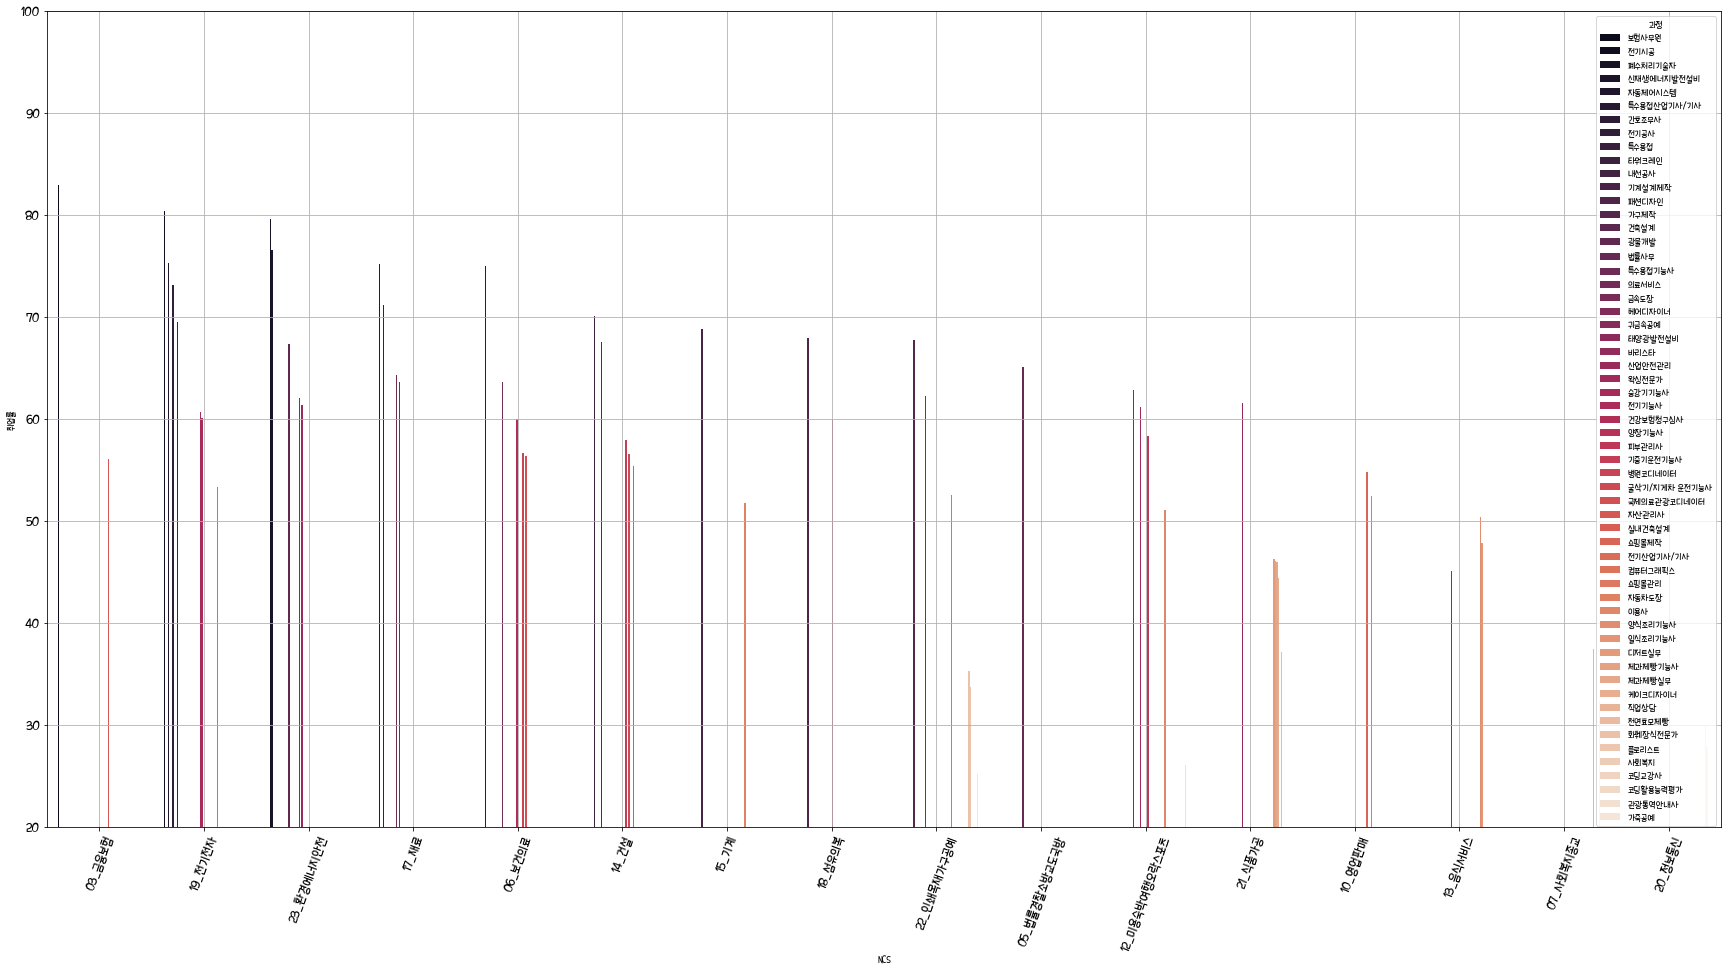

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('hrdcrolling/preprocessing/final.csv', index_col = 0)

df = df.loc[:,['NCS', '취업률','과정','연령대']]

# def age_filter(data, age):
#     return 10 < data["연령대"].mean() < age
df.dropna(subset=['연령대'], inplace=True)
df = df.groupby(["NCS", "과정"]).mean()
df = df.reset_index(level=['과정'])
df.sort_values(by=['취업률'], ascending=False, inplace=True)
df = df.loc[(df.연령대 < 40) & (df.연령대>= 30), :]

# display(df)

# n = int(round(len(df)/2))
# df1 = df.head(n)
# df2 = df.tail(n)

fig = plt.figure(figsize=(30,15))
ax1 = fig.add_subplot(1, 1, 1)
# ax2 = fig.add_subplot(2, 1, 2)

sns.barplot(x=df.index, y='취업률', hue='과정', data=df, palette='rocket', ax=ax1)
# sns.barplot(x=df2.index, y='취업률', data=df2, palette='rocket', ax=ax2)
plt.xticks(size=14, rotation=70)
plt.yticks(size=14)
plt.grid(True)
plt.ylim(20, 100)

plt.show()
plt.close()

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('hrdcrolling/preprocessing/final.csv', index_col = 0)

NCS = [None,None,None]
NCS_list = df['NCS'].drop_duplicates().tolist()
for i in range(len(NCS_list)):
    NCS.append(NCS_list[i])
    
df = round(df.groupby(["NCS","과정"]).mean(), 0)

df = df.loc[NCS[3]].sort_values(by=["취업률"], ascending=False)

display(df)

[None, None, None, '03_금융보험', '04_교육자연사회과학', '05_법률경찰소방교도국방', '06_보건의료', '07_사회복지종교', '08_문화예술디자인', '09_운전운송', '10_영업판매', '11_경비청소', '12_미용숙박여행오락스포츠', '13_음식서비스', '14_건설', '15_기계', '17_재료', '18_섬유의복', '19_전기전자', '20_정보통신', '21_식품가공', '22_인쇄목재가구공예', '23_환경에너지안전', '24_농림어업']


,기간,훈련비,정원,취업률,연령대
과정,,,,,
보험사무원,34.0,1141271.0,19.0,80.0,34.0
자산관리사,83.0,249480.0,500.0,56.0,35.0
